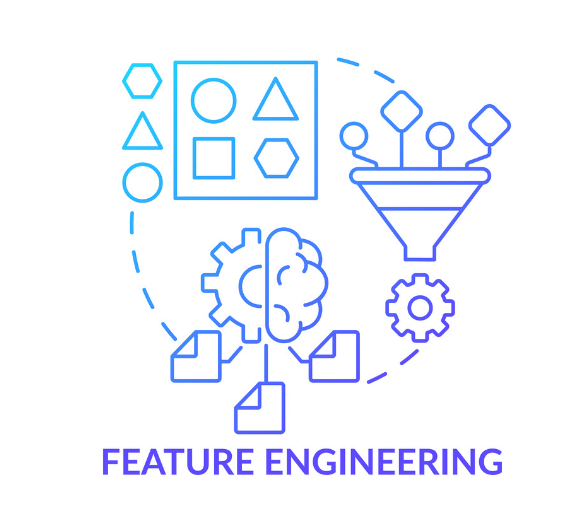

## Feature Engineering

**Feature Engineering** - конструирование признаков - процесс, во время которого мы извлекаем новые переменные для таблицы из необработанных данных.

[Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/index.html)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

### Полиномизация

Часто бывает полезно усложнить модель, заставив ее учитывать нелинейные особенности входных данных. Простой и распространенный метод для этого — полиномиальные функции.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures



```
Generate a new feature matrix consisting of all polynomial combinations of
the features with degree less than or equal to the specified degree.

For example, if an input sample is two dimensional and of the form [a, b],
the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
```



In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [ ]:
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

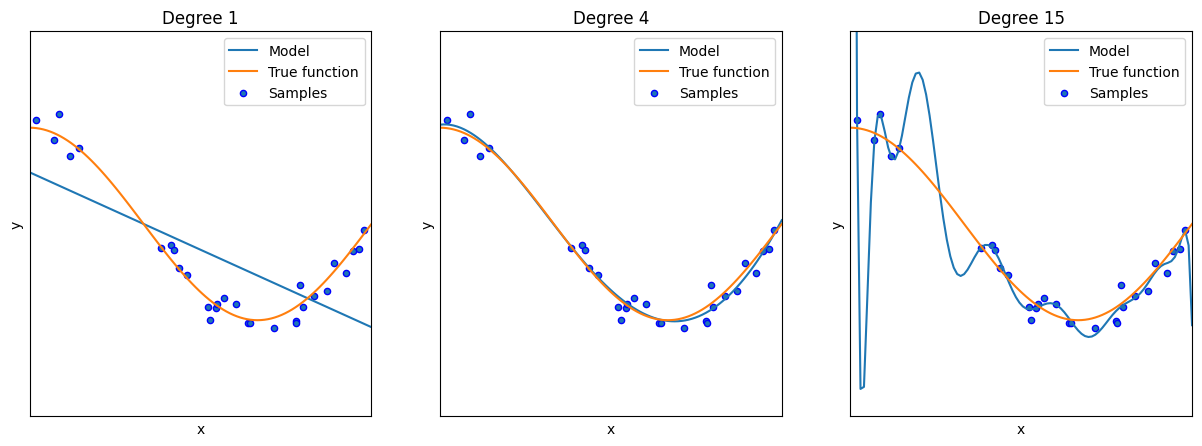

In [ ]:
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, y_test, label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degree}")

plt.show()

### Биннинг

Дискретизация вещественных признаков

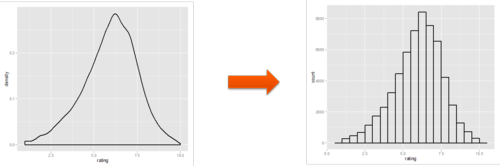

#### FunctionTransformer + pd.cut

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
age_data = np.random.randint(18, 80, size=15)
age_data

array([59, 53, 18, 49, 23, 48, 18, 67, 68, 54, 52, 66, 47, 21, 52])

In [ ]:
bins = [18, 23, 30, 45, 59, np.inf]
labels = ['student', 'young_specialist', 'specialist', 'adult', 'senior citizen']

In [ ]:
transformer = FunctionTransformer(
  func=pd.cut,
  kw_args={'bins': bins, 'labels': labels, 'retbins': False},
)
transformer.fit_transform(age_data)

['adult', 'adult', NaN, 'adult', 'student', ..., 'adult', 'senior citizen', 'adult', 'student', 'adult']
Length: 15
Categories (5, object): ['student' < 'young_specialist' < 'specialist' < 'adult' < 'senior citizen']

#### KBinsDiscretizer

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
kbins.fit_transform(age_data.reshape(-1, 1))

array([[4.],
       [3.],
       [0.],
       [3.],
       [0.],
       [3.],
       [0.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [0.],
       [3.]])

In [ ]:
kbins.bin_edges_ # границы бинов

array([array([18., 28., 38., 48., 58., 68.])], dtype=object)